In [1]:
!pip install duckdb

     |████████████████████████████████| 11.2 MB 8.7 MB/s eta 0:00:01


In [1]:
import mdsutils
import pandas as pd

athena = mdsutils.AthenaClient(database='datalake_production_money_monitoring')

In [67]:
query = """
select
    created_dt, 
    updated_dt,
    json_extract(money_cache_snapshot_v2, '$.giactData["version"]') as giactData_version,
    json_extract(money_cache_snapshot_v2, '$.giactData["lastModifiedDate"]') as giactData_lastModifiedDate,
    json_extract(money_cache_snapshot_v2, '$.giactData["customerDeniedCount"]') as giactData_customerDeniedCount,
    json_extract(money_cache_snapshot_v2, '$.giactData["giactAccountDetails"]') as giactData_giactAccountDetails,
    json_extract(money_cache_snapshot_v2, '$.giactData["failedMicroDepositCount"]') as giactData_failedMicroDepositCount,
    json_extract(money_cache_snapshot_v2, '$.giactData["totalGiactResponseCount"]') as giactData_totalGiactResponseCount,
    json_extract(money_cache_snapshot_v2, '$.giactData["passedGiactResponseCount"]') as giactData_passedGiactResponseCount,
    json_extract(money_cache_snapshot_v2, '$.giactData["failedLinkingAccountCount"]') as giactData_failedLinkingAccountCount,
    json_extract(money_cache_snapshot_v2, '$.giactData["declinedGiactResponseCount"]') as giactData_declinedGiactResponseCount,
    json_extract(money_cache_snapshot_v2, '$.creditData["fico"]') as creditData_fico,
    json_extract(money_cache_snapshot_v2, '$.creditData["all0300"]') as creditData_all0300,
    json_extract(money_cache_snapshot_v2, '$.creditData["all7120"]') as creditData_all7120,
    json_extract(money_cache_snapshot_v2, '$.creditData["all8220"]') as creditData_all8220,
    json_extract(money_cache_snapshot_v2, '$.creditData["bcc2800"]') as creditData_bcc2800,
    json_extract(money_cache_snapshot_v2, '$.creditData["bcc7120"]') as creditData_bcc7120,
    json_extract(money_cache_snapshot_v2, '$.creditData["bcx3423"]') as creditData_bcx3423,
    json_extract(money_cache_snapshot_v2, '$.creditData["iln5520"]') as creditData_iln5520,
    json_extract(money_cache_snapshot_v2, '$.creditData["iqt9413"]') as creditData_iqt9413,
    json_extract(money_cache_snapshot_v2, '$.creditData["iqt9415"]') as creditData_iqt9415,
    json_extract(money_cache_snapshot_v2, '$.creditData["iqt9846"]') as creditData_iqt9846,
    json_extract(money_cache_snapshot_v2, '$.creditData["mtf5820"]') as creditData_mtf5820,
    json_extract(money_cache_snapshot_v2, '$.creditData["stu5031"]') as creditData_stu5031,
    json_extract(money_cache_snapshot_v2, '$.creditData["vantage"]') as creditData_vantage,
    json_extract(money_cache_snapshot_v2, '$.creditData["version"]') as creditData_version,
    json_extract(money_cache_snapshot_v2, '$.creditData["creditScoreId"]') as creditData_creditScoreId,
    json_extract(money_cache_snapshot_v2, '$.creditData["autoLoanAmount"]') as creditData_autoLoanAmount,
    json_extract(money_cache_snapshot_v2, '$.creditData["lastModifiedDate"]') as creditData_lastModifiedDate,
    json_extract(money_cache_snapshot_v2, '$.creditData["securedLoanAmount"]') as creditData_securedLoanAmount,
    json_extract(money_cache_snapshot_v2, '$.creditData["creditPullDateTime"]') as creditData_creditPullDateTime,
    json_extract(money_cache_snapshot_v2, '$.creditData["mortgageLoanAmount"]') as creditData_mortgageLoanAmount,
    json_extract(money_cache_snapshot_v2, '$.creditData["educationLoanAmount"]') as creditData_educationLoanAmount,
    json_extract(money_cache_snapshot_v2, '$.creditData["totalTradelinesOpen"]') as creditData_totalTradelinesOpen,
    json_extract(money_cache_snapshot_v2, '$.creditData["unsecuredLoanAmount"]') as creditData_unsecuredLoanAmount,
    json_extract(money_cache_snapshot_v2, '$.creditData["creditCardLoanAmount"]') as creditData_creditCardLoanAmount,
    json_extract(money_cache_snapshot_v2, '$.creditData["delinquenciesNinetyDays"]') as creditData_delinquenciesNinetyDays,
    json_extract(money_cache_snapshot_v2, '$.creditData["totalOutstandingBalance"]') as creditData_totalOutstandingBalance,
    json_extract(money_cache_snapshot_v2, '$.creditData["experianIdentityVerifications"]') as creditData_experianIdentityVerifications,
    json_extract(money_cache_snapshot_v2, '$.socureData["date"]') as socureData_date,
    json_extract(money_cache_snapshot_v2, '$.socureData["version"]') as socureData_version,
    json_extract(money_cache_snapshot_v2, '$.socureData["emailRisk"]') as socureData_emailRisk,
    json_extract(money_cache_snapshot_v2, '$.socureData["phoneRisk"]') as socureData_phoneRisk,
    json_extract(money_cache_snapshot_v2, '$.socureData["sigmaScore"]') as socureData_sigmaScore,
    json_extract(money_cache_snapshot_v2, '$.socureData["genericScore"]') as socureData_genericScore,
    json_extract(money_cache_snapshot_v2, '$.socureData["thirdPartyRawId"]') as socureData_thirdPartyRawId,
    json_extract(money_cache_snapshot_v2, '$.socureData["addressRiskScore"]') as socureData_addressRiskScore,
    json_extract(money_cache_snapshot_v2, '$.socureData["lastModifiedDate"]') as socureData_lastModifiedDate,
    json_extract(money_cache_snapshot_v2, '$.socureData["allSocureReasonCodes"]') as socureData_allSocureReasonCodes,
    json_extract(money_cache_snapshot_v2, '$.socureData["nameEmailCorrelation"]') as socureData_nameEmailCorrelation,
    json_extract(money_cache_snapshot_v2, '$.socureData["namePhoneCorrelation"]') as socureData_namePhoneCorrelation,
    json_extract(money_cache_snapshot_v2, '$.socureData["nameAddressCorrelation"]') as socureData_nameAddressCorrelation,
    json_extract(money_cache_snapshot_v2, '$.transactionRollupDataV2["version"]') as transactionRollupDataV2_version,
    json_extract(money_cache_snapshot_v2, '$.transactionRollupDataV2["accountMap"]') as transactionRollupDataV2_accountMap,
    json_extract(money_cache_snapshot_v2, '$.transactionRollupDataV2["lastModifiedDate"]') as transactionRollupDataV2_lastModifiedDate,
    json_extract(money_cache_snapshot_v2, '$.transactionReturnRollupDataV2["version"]') as transactionReturnRollupDataV2_version,
    json_extract(money_cache_snapshot_v2, '$.transactionReturnRollupDataV2["accountMap"]') as transactionReturnRollupDataV2_accountMap,
    json_extract(money_cache_snapshot_v2, '$.transactionReturnRollupDataV2["lastModifiedDate"]') as transactionReturnRollupDataV2_lastModifiedDate
from datalake_production_money_monitoring.money_cache_snapshot_v2
"""
# df = athena.query_to_df(query)

In [68]:
# df.to_parquet("../../artifacts/money_cache_snapshot_full.parquet")

In [13]:
df = pd.read_parquet("../../artifacts/money_cache_snapshot_full.parquet", columns=["created_dt", "transactionReturnRollupDataV2_accountMap"])

In [14]:
df.shape, df.dtypes

((11820918, 2),
 created_dt                                  object
 transactionReturnRollupDataV2_accountMap    object
 dtype: object)

In [20]:
def jsonfy(j):
    if j is None:
        return {}
    return json.loads(str(j))

df["transactionReturnRollupDataV2_accountMap"] = df["transactionReturnRollupDataV2_accountMap"].apply(jsonfy)

In [25]:
def get_bid(d):
    l = list(d.keys())
    if len(l) > 0:
        return l[0]
    return None

df["business_account_number"] = df["transactionReturnRollupDataV2_accountMap"].apply(get_bid)

In [27]:
df["business_account_number"].nunique()

290077

In [26]:
df["business_account_number"].value_counts()

null            186421
410005119171      3679
410000329662      3064
410014552320      2240
410004777047      2195
                 ...  
410013917404         1
410011484372         1
410008442344         1
410003980891         1
410006652084         1
Name: business_account_number, Length: 290077, dtype: int64

<AxesSubplot:>

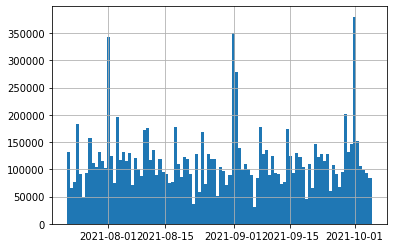

In [9]:
df["created_dt"] = pd.to_datetime(df["created_dt"])
df.created_dt.hist(bins=100)

In [12]:
import json

j = """
{"@type": "MoneyCacheDataV2", "tmxData": {"version": "'ZtrhMFCtWORH0DPS18fubiBH0unZcbgxZz8+6wL5Irc='", "dnsIpLatitude": 39.99558, "dnsIpLongitude": -82.99946, "trueIpLatitude": 38.01602, "trueIpLongitude": -84.48788, "lastModifiedDate": "2021-08-16T22:03:28.45194Z", "summaryRiskScore": 0.0, "trueIpWorstScore": 0.0, "digitalIdTrustScore": 79.0, "accountAddressZipLatitude": 38.001, "accountAddressZipLongitude": -84.5282}, "giactData": {"version": "'F5VWWeQTIijw0i7l17WG43TCOJRkLnveyqSVZ3Oj6ao='", "lastModifiedDate": "2021-08-05T11:55:27.242435Z", "customerDeniedCount": 0, "giactAccountDetails": [{"@type": "GiactAccountDetailsV3", "decisionDate": "2020-12-01T15:36:53.847216", "linkedAccountId": "3031054451", "linkingDecision": "PASS", "linkingResultId": "b2b5e905-2222-4f8d-8fe4-bd1f9f880f9e", "giactDetailsSource": {"@type": ".GiactDetailsSource$MoneyLinking", "linkingResultId": "b2b5e905-2222-4f8d-8fe4-bd1f9f880f9e"}, "giactResponseCreatedDt": "2020-12-01T15:36:53.847216Z", "linkedAccountRoutingNumber": "083000108"}], "lastLinkAttemptDate": "2020-12-01", "failedMicroDepositCount": 0, "totalGiactResponseCount": 1, "passedGiactResponseCount": 0, "failedLinkingAccountCount": 0, "declinedGiactResponseCount": 0, "thirdPartyNameMismatchCount": 0, "failedMicroDepositCount30Days": 0, "failedLinkingAccountCount30Days": 0, "nameMismatchOrGiactCustomerFailedCount": 0}, "partyData": {"version": "'JAQs51zCUM1tXNtdmbol85gM7uNIbsmV/Vuk9MC18to='", "lastModifiedDate": "2021-08-05T11:55:27.249954Z", "citizenshipStatus": "CITIZEN"}, "creditData": {"fico": 690, "all0300": 14, "all7120": 114, "all8220": 193, "bcc2800": 0, "bcc7120": 12, "bcx3423": 0, "iln5520": 61155, "iqt9413": 1, "iqt9415": 1, "iqt9846": 400, "mtf5820": 999999998, "stu5031": 69441, "vantage": 725, "version": "'dAMP0GKWd4ZzikV+TB67EgSuqcuczRlxYxsf4fh3mqc='", "creditScoreId": 15912305, "autoLoanAmount": 0, "lastModifiedDate": "2021-08-19T12:33:34.015012Z", "securedLoanAmount": 0, "creditPullDateTime": "2020-11-17T02:26:45Z", "mortgageLoanAmount": 0, "educationLoanAmount": 69441, "totalTradelinesOpen": 7, "unsecuredLoanAmount": 0, "creditCardLoanAmount": 345, "delinquenciesNinetyDays": 12, "totalOutstandingBalance": 70766, "experianIdentityVerifications": {"dobVerified": false, "ssnVerified": true, "nameVerified": true, "addressVerified": true}}, "investData": {"@type": "InvestData", "version": "'Co4Pyd7SkEfdTEBO+IaFTrlOf0jGHhOxLPE4zztNxQ8='", "investData": [], "lastModifiedDate": "2021-08-16T22:03:28.44091Z"}, "socureData": {"date": "2020-11-17T02:26:47.684913Z", "version": "'0OxNhgZWaEesa9nWQscH+m6DDsKUDCqynOAWQAieCFs='", "emailRisk": 0.295, "phoneRisk": 0.424, "sigmaScore": 0.009, "kycDobScore": 0.99, "kycSsnScore": 0.99, "kycZipScore": 0.99, "genericScore": 0.0297, "kycCityScore": 0.99, "kycStateScore": 0.99, "kycSurnameScore": 0.99, "thirdPartyRawId": "8014a600-aff0-4ed8-855b-22356313c3c5", "addressRiskScore": 0.995, "lastModifiedDate": "2021-08-16T22:03:28.433031Z", "kycFirstnameScore": 0.99, "allSocureReasonCodes": ["I196", "R720", "I351", "I630", "I553", "I711", "R705", "I556", "I611", "R607", "I555", "I558", "I557", "I614", "I618", "R610", "I121", "R919", "I620", "I520", "I127", "I602", "I621", "I622", "I705", "I626", "I707"], "kycMobileNumberScore": 0.01, "nameEmailCorrelation": 0.9999, "namePhoneCorrelation": 0.9999, "kycStreetAddressScore": 0.01, "nameAddressCorrelation": 0.1843}, "fundedPLData": {"version": "'tSpxZd6Hsyhksy42JGca3wn/qwr9tEcHtnSJvHYuWPM='", "lastModifiedDate": "2021-08-16T22:03:28.418168Z"}, "accountDataV2": {"version": "'cGb6+ie9ulUI3wPwwxEj+Go6DKrDwwt/tnGQpDkcZRM='", "accountMap": {"410009697215": {"status": "ACTIVE", "isRestricted": false, "accountNumber": 410009697215, "isPrimaryParty": true, "accountOpenedDate": "2020-11-16"}}, "lastModifiedDate": "2021-08-13T12:44:45.56326Z"}, "riskGroupData": {"version": "'MYoXQQVgfw+4RgOkR5LuYv5tSsQBO1EhU88tj8TbuOc='", "riskGroup": "RG1", "lastModifiedDate": "2021-08-18T03:05:43.172777Z"}, "employmentData": {"version": "'dLH+d3rmYUcU4f5oA2E3KnQxMfdedVuE5XK9N6QbSwA='", "employmentDatum": {"selfEmployed": false, "employmentStartDate": "2021-05-01", "compensationSourceId": 16760334}, "lastModifiedDate": "2021-08-05T11:55:27.237289Z"}, "fundedREFIData": {"version": "'VsYVvT+ZsPNpjM8P0k2GQNh3S6ByDl/mRANkStNIFE4='", "lastModifiedDate": "2021-08-16T22:03:28.422453Z"}, "transactionRollupDataV2": {"version": "'pLjd0mn6HnqdSx6Ee8REPe49dM6LCKaWGLitT/xsFF8='", "accountMap": {"410009697215": {"lifetimeDebits": 4485.86, "allReturnsCount": 0, "lifetimeCredits": 4650.68, "returnCodeCount": 0, "initialDepositDate": "2020-12-01T16:01:53Z", "number1KWithdrawal": 0, "chargeBackCodeCount": 0, "accountEndingBalance": 140.85, "firstUserDepositDate": "2020-12-01T16:01:53Z", "directDepositCodeCount": 0, "firstUserDepositAmount": 235.0, "mostRecentTransactionCode": "DDTRF", "mostRecentTransactionDate": "2021-08-24T12:08:18-04:00", "lifetimeDollarValueReturns": 0, "qualifyingTransactionCount": 864, "customerModelDepositCodeCount": 33, "customerModelFirstDepositAmount": 235.0, "lifetimeDollarValueDirectDeposits": 0, "signedMostRecentTransactionAmount": 0.36, "mostRecentQualifyingTransactionCode": "DDTRF", "mostRecentQualifyingTransactionDate": "2021-08-24T12:08:18-04:00", "previousMostRecentQualifyingTransactionDate": "2021-08-24T16:08:18Z", "signedMostRecentQualifyingTransactionAmount": 0.36}}, "lastModifiedDate": "2021-07-21T17:01:25.508095Z"}, "investBalanceHistoryData": {"lastModifiedDate": "2021-08-24T00:00:12.910402Z", "recentAverageBalance": 0.00, "investBalanceHistoryMap": {"2021-08-14": 0, "2021-08-15": 0, "2021-08-16": 0, "2021-08-17": 0, "2021-08-18": 0, "2021-08-19": 0, "2021-08-20": 0, "2021-08-21": 0, "2021-08-22": 0, "2021-08-23": 0, "2021-08-24": 0}}, "pendingDepositRollupDataV2": {"version": "'UXlBMEPdIzjipGePZTxav2AZKjMLm41/kHsQwYJHcZ0='", "accountMap": {"410009697215": {"linkedAccountDeposits": [{"linkedAccountId": "3031054451", "numPendingDepositsLast24Hours": 2}]}}, "lastModifiedDate": "2021-08-24T16:33:58.223777Z"}, "transactionReturnRollupDataV2": {"version": "default", "accountMap": {"410009697215": {"last30DaysReturnRollup": []}}, "lastModifiedDate": "2021-07-21T17:01:25.508099Z"}}
"""
json.loads(j)

{'@type': 'MoneyCacheDataV2',
 'tmxData': {'version': "'ZtrhMFCtWORH0DPS18fubiBH0unZcbgxZz8+6wL5Irc='",
  'dnsIpLatitude': 39.99558,
  'dnsIpLongitude': -82.99946,
  'trueIpLatitude': 38.01602,
  'trueIpLongitude': -84.48788,
  'lastModifiedDate': '2021-08-16T22:03:28.45194Z',
  'summaryRiskScore': 0.0,
  'trueIpWorstScore': 0.0,
  'digitalIdTrustScore': 79.0,
  'accountAddressZipLatitude': 38.001,
  'accountAddressZipLongitude': -84.5282},
 'giactData': {'version': "'F5VWWeQTIijw0i7l17WG43TCOJRkLnveyqSVZ3Oj6ao='",
  'lastModifiedDate': '2021-08-05T11:55:27.242435Z',
  'customerDeniedCount': 0,
  'giactAccountDetails': [{'@type': 'GiactAccountDetailsV3',
    'decisionDate': '2020-12-01T15:36:53.847216',
    'linkedAccountId': '3031054451',
    'linkingDecision': 'PASS',
    'linkingResultId': 'b2b5e905-2222-4f8d-8fe4-bd1f9f880f9e',
    'giactDetailsSource': {'@type': '.GiactDetailsSource$MoneyLinking',
     'linkingResultId': 'b2b5e905-2222-4f8d-8fe4-bd1f9f880f9e'},
    'giactResponseC